In [ ]:
#1


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'file_path' with the actual image path)
file_path = "colorful.jpg"  # Replace with actual image path
image = cv2.imread(file_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Split the image into blue, green, and red channels
b, g, r = cv2.split(image)

# Create figure and axes grid (2 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Grayscale Image
axes[0, 1].imshow(gray_image, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

# Red Channel (set green and blue to 0)
red_image = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
axes[0, 2].imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Red Channel')
axes[0, 2].axis('off')

# Green Channel (set red and blue to 0)
green_image = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
axes[1, 0].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Green Channel')
axes[1, 0].axis('off')

# Blue Channel (set red and green to 0)
blue_image = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])
axes[1, 1].imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Blue Channel')
axes[1, 1].axis('off')

# Perform 2D convolution (sharpening filter)
kernel_2d = np.array([[1, 1, 1],
                      [1, -8, 1],
                      [1, 1, 1]])
conv_2d_image = cv2.filter2D(gray_image, -1, kernel_2d)
axes[1, 2].imshow(conv_2d_image, cmap='gray')
axes[1, 2].set_title('2D Convolution')
axes[1, 2].axis('off')


kernel_1d = np.array([1, 0, -1])
conv_1d_image = cv2.filter2D(gray_image, -1, kernel_1d)
axes[2, 0].imshow(conv_1d_image, cmap='gray')
axes[2, 0].set_title('1D Convolution')
axes[2, 0].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


: 

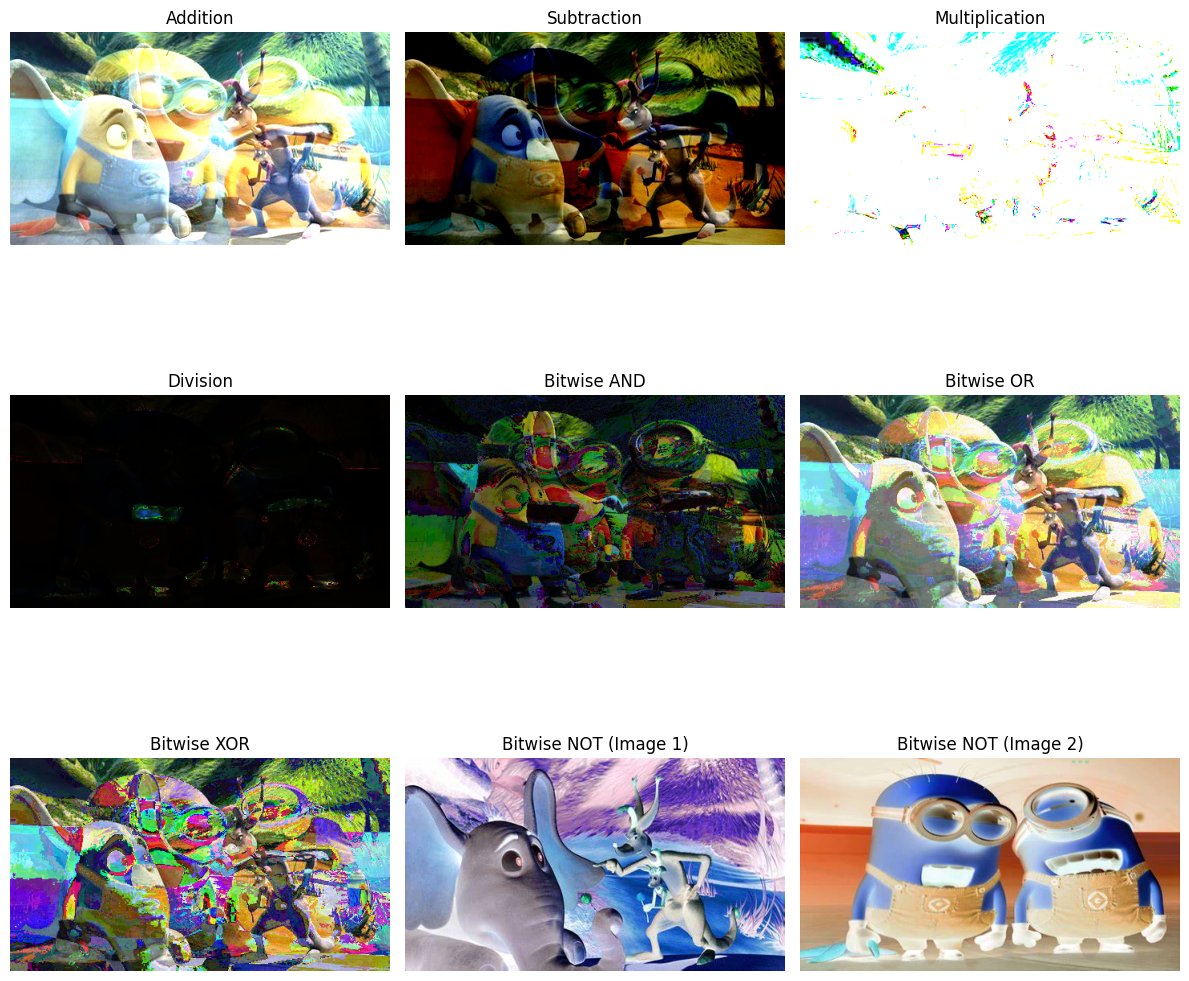

In [ ]:
#2

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images (Replace 'img1_path' and 'img2_path' with actual file paths)
img1 = cv2.imread('OIP.JPG')
img2 = cv2.imread('OIP2.JPG')


height, width = min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1])
img1 = cv2.resize(img1, (width, height))
img2 = cv2.resize(img2, (width, height))

# Perform arithmetic operations
add = cv2.add(img1, img2)
subtract = cv2.subtract(img1, img2)
multiply = cv2.multiply(img1, img2)
divide = cv2.divide(img1, img2)

# Perform logical operations
bitwise_and = cv2.bitwise_and(img1, img2)
bitwise_or = cv2.bitwise_or(img1, img2)
bitwise_xor = cv2.bitwise_xor(img1, img2)
bitwise_not_img1 = cv2.bitwise_not(img1)
bitwise_not_img2 = cv2.bitwise_not(img2)

# Titles and images
titles = ['Addition', 'Subtraction', 'Multiplication', 'Division',
          'Bitwise AND', 'Bitwise OR', 'Bitwise XOR', 'Bitwise NOT (Image 1)', 'Bitwise NOT (Image 2)']
images = [add, subtract, multiply, divide,
          bitwise_and, bitwise_or, bitwise_xor, bitwise_not_img1, bitwise_not_img2]

# Create figure and axes
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Display images using OO approach
for i, ax in enumerate(axes):
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax.set_title(titles[i])
    ax.axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#3 and 5

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load an image in grayscale (feel free to replace with your own image)
image = cv2.imread('OIP.jpg',0)  # Grayscale image

# --- Negative Transformation ---
# This inverts the pixel intensities, making dark pixels bright and vice versa.
# Formula: I_out = L - 1 - I_in, where L is the max intensity (255 for 8-bit images)
negative_transformed = 255 - image

# --- Gamma Transformation ---
# Gamma transformation adjusts brightness using a non-linear mapping function.
# Formula: I_out = c * (I_in / 255) ** gamma
# If gamma < 1 -> enhances dark regions (brightens the image)
# If gamma > 1 -> enhances bright regions (darkens the image)
gamma = 3  # Try different values like 0.5, 1, 2, 3
gamma_transformed = np.array(255 * (image / 255) ** gamma, dtype=np.uint8)

# --- Log Transformation ---
# Expands dark pixel values and compresses bright ones.
# Formula: I_out = c * log(1 + I_in)
c = 255 / np.log(1 + np.max(image))  # Normalize constant based on the maximum pixel value
log_transformed = c * np.log(1 + image)

# --- Contrast Enhancement (Contrast Stretching) ---
# Expands intensity range to improve contrast.
# Formula: I_out = (I_in - min(I)) * (255 / (max(I) - min(I)))
contrast_stretched = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# --- Contrast Enhancement using Histogram Equalization ---
# Enhances contrast by redistributing intensity levels.
equalized_image = cv2.equalizeHist(image)

# --- Thresholding ---
# Converts an image to binary form based on a threshold.
# If pixel value > threshold, set to max (255), else set to min (0)
thresh_value = 127  # Change threshold value as needed
_, thresholded_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)

# --- Visualizing the Transformations using Matplotlib ---
plt.figure(figsize=(12, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Negative Transformation
plt.subplot(3, 3, 2)
plt.imshow(negative_transformed, cmap='gray')
plt.title('Negative Transformation')
plt.axis('off')

# Gamma Transformation
plt.subplot(3, 3, 3)
plt.imshow(gamma_transformed, cmap='gray')
plt.title(f'Gamma Transformation (gamma={gamma})')
plt.axis('off')

# Log Transformation
plt.subplot(3, 3, 4)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

# Contrast Enhancement (Stretching)
plt.subplot(3, 3, 5)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Enhancement (Stretching)')
plt.axis('off')

# Contrast Enhancement (Histogram Equalization)
plt.subplot(3, 3, 6)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

# Thresholding
plt.subplot(3, 3, 7)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Thresholding (T={thresh_value})')
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\ARSHAN\AppData\Local\Temp\ipykernel_4804\1544535860.py:25: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + image)


In [ ]:

#4
import cv2
import numpy as np
import matplotlib.pyplot as plt
"""
Each pixel in an 8-bit grayscale image is represented using 8 bits (values from 0 to 255).
 The technique helps in analyzing which bits contribute most to image clarity and which bits 
 contain noise or fine det
 
 Higher-order bits (MSB - Most Significant Bits) contain more structural information.
Lower-order bits (LSB - Least Significant Bits) contain fine details and often noise.
Extracting bit planes separately allows us to analyze and reconstruct an image with just
 a few significant bits.
 

 Consider a grayscale pixel value 235, its 8-bit binary representation is:
235 = 1 1 1 0 1 0 1 1
The leftmost bits (1 1 1 0) contribute most to the brightness.
The rightmost bits (1 0 1 1) contribute to fine details.
 """
# Load grayscale image
img = cv2.imread("C:/Users/ARSHAN/Desktop/5th/codes/trials/image.jpg", cv2.IMREAD_GRAYSCALE)

# Ensure the image is loaded
if img is None:
    raise FileNotFoundError("Image not found! Check the file path.")

### 🔹 Extract Bit-Planes
bit_planes = []  # List to store bit-plane images

# Extract 8 bit-planes one by one
for i in range(8):  
    bit_plane = (img & (1 << i)) >> i  # Mask and shift to extract the i-th bit plane
    bit_planes.append(bit_plane * 255)  # Scale up (0 → 0, 1 → 255 for visualization)
"""
        1️⃣ 1 << i (Bitwise Left Shift)

        1 << i shifts the binary 1 to the left by i positions.
        Example for different i values:

        1 << 0  →  00000001 (Extracts bit 0)
        1 << 1  →  00000010 (Extracts bit 1)
        1 << 2  →  00000100 (Extracts bit 2)
        ...
        1 << 7  →  10000000 (Extracts bit 7)

        2️⃣ img & (1 << i) (Bitwise AND Masking)
        The & (AND) operator keeps only the bit at position i and sets all other bits to 0.
        Example (for i = 2):
      
        img pixel:  11010110  (Example pixel value: 214)
        mask:       00000100  (1 << 2)
        Result:     00000100  (Only bit at position 2 is kept)

        3️⃣ >> i (Bitwise Right Shift)
        We shift the extracted bit all the way to the right, making it either 0 or 1.
        Example (continuing from i = 2):

        Before Shift:  00000100  (Bit we extracted)
        After Shift:   00000001  (Now it's either 0 or 1)

        """

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# for i in range(8):
#     ax = axes[i // 4, i % 4]  # Arrange in 2 rows, 4 columns
#     ax.imshow(bit_planes[i], cmap='gray')
#     ax.set_title(f"Bit Plane {i}")
#     ax.axis("off")
#or:


# Manually plot each bit-plane
axes[0, 0].imshow(bit_planes[0], cmap='gray')
axes[0, 0].set_title("Bit Plane 0")
axes[0, 0].axis("off")

axes[0, 1].imshow(bit_planes[1], cmap='gray')
axes[0, 1].set_title("Bit Plane 1")
axes[0, 1].axis("off")

axes[0, 2].imshow(bit_planes[2], cmap='gray')
axes[0, 2].set_title("Bit Plane 2")
axes[0, 2].axis("off")

axes[0, 3].imshow(bit_planes[3], cmap='gray')
axes[0, 3].set_title("Bit Plane 3")
axes[0, 3].axis("off")

axes[1, 0].imshow(bit_planes[4], cmap='gray')
axes[1, 0].set_title("Bit Plane 4")
axes[1, 0].axis("off")

axes[1, 1].imshow(bit_planes[5], cmap='gray')
axes[1, 1].set_title("Bit Plane 5")
axes[1, 1].axis("off")

axes[1, 2].imshow(bit_planes[6], cmap='gray')
axes[1, 2].set_title("Bit Plane 6")
axes[1, 2].axis("off")

axes[1, 3].imshow(bit_planes[7], cmap='gray')
axes[1, 3].set_title("Bit Plane 7")
axes[1, 3].axis("off")


plt.show()



In [ ]:
#6
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread("OIP.jpg", 0)

# Compute the DFT (Fourier Transform) and shift to center
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Create frequency domain filters (low-pass & high-pass)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Low-pass filter (keeps low frequencies)
low_pass = np.zeros((rows, cols), np.uint8)
low_pass[crow-30:crow+30, ccol-30:ccol+30] = 1  # 60x60 central pass area

# High-pass filter (removes low frequencies)
high_pass = 1 - low_pass  # Complement of low-pass

# Apply filters in frequency domain
low_filtered = dft_shift * low_pass
high_filtered = dft_shift * high_pass

# Perform inverse DFT
low_result = np.abs(np.fft.ifft2(np.fft.ifftshift(low_filtered)))
high_result = np.abs(np.fft.ifft2(np.fft.ifftshift(high_filtered)))

# ---- Display Results (Using Object-Oriented Subplots) ----
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ["Original", "Low-Pass (Blurred)", "High-Pass (Edges)", "Magnitude Spectrum"]

# Original Image
axes[0].imshow(image, cmap="gray")
axes[0].set_title(titles[0])
axes[0].axis("off")

# Low-Pass Filtered Image (Smooth)
axes[1].imshow(low_result, cmap="gray")
axes[1].set_title(titles[1])
axes[1].axis("off")

# High-Pass Filtered Image (Edges)
axes[2].imshow(high_result, cmap="gray")
axes[2].set_title(titles[2])
axes[2].axis("off")

# Magnitude Spectrum (Visualization of Frequency Components)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
axes[3].imshow(magnitude_spectrum, cmap="gray")
axes[3].set_title(titles[3])
axes[3].axis("off")

plt.tight_layout()
plt.show()


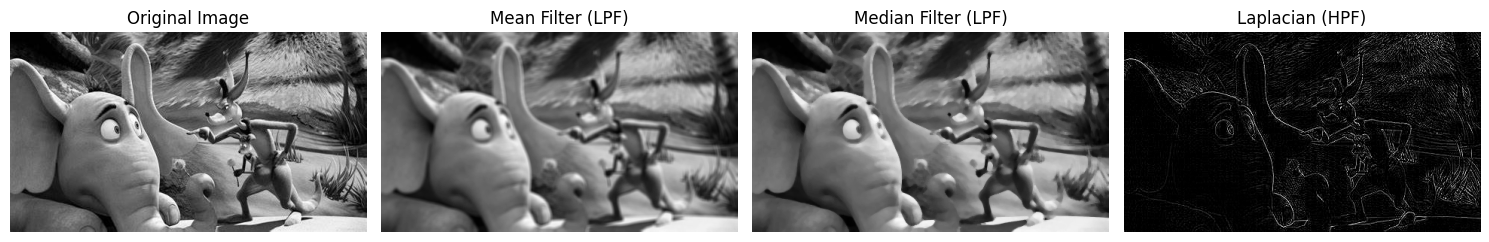

In [ ]:
#7

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Low-Pass Filtering (Mean Filter)
mean_kernel = np.ones((5, 5), np.float32) / 25  # 5x5 averaging kernel
mean_filtered = cv2.filter2D(image, -1, mean_kernel)

# Apply Low-Pass Filtering (Median Filter)
median_filtered = cv2.medianBlur(image, 5)  # Kernel size 5

# Apply High-Pass Filtering (Laplacian)

laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])  
laplacian_filtered = cv2.filter2D(image, -1, laplacian_kernel)  # 

# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display Mean Filtered Image
axes[1].imshow(mean_filtered, cmap='gray')
axes[1].set_title("Mean Filter (LPF)")
axes[1].axis('off')

# Display Median Filtered Image
axes[2].imshow(median_filtered, cmap='gray')
axes[2].set_title("Median Filter (LPF)")
axes[2].axis('off')

# Display High-Pass Filtered Image
axes[3].imshow(laplacian_filtered, cmap='gray')
axes[3].set_title("Laplacian (HPF)")
axes[3].axis('off')

# Adjust layout and show
plt.tight_layout()
plt.show()


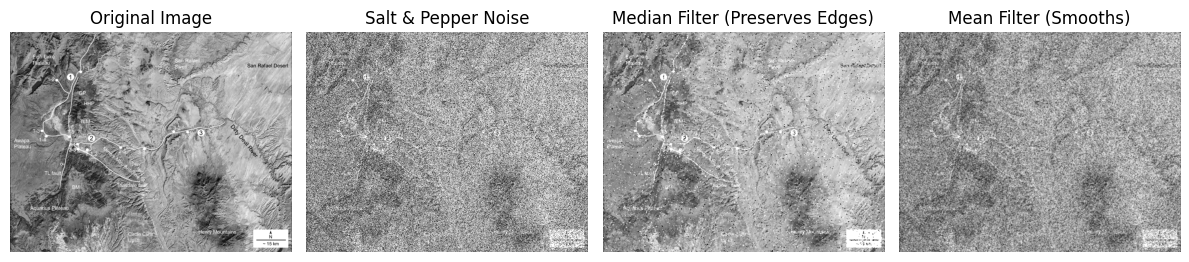

In [ ]:
#8
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_pepper_noise(image, salt_prob=0.3, pepper_prob=0.2):
    noisy_img = np.copy(image)
    total_pixels = image.size
    
    num_salt = int(salt_prob * total_pixels)
    rows = np.random.randint(0, image.shape[0], num_salt)  # Select row indices
    cols = np.random.randint(0, image.shape[1], num_salt)  # Select column indices

    noisy_img[rows, cols] = 255  # Set salt noise pixels to white
    
    
    num_pepper = int(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]   #same as above , u can do either
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0  
    
    return noisy_img

# def median_filter(img, kernel_size=3):
#     h, w = img.shape
#     pad = kernel_size // 2
#     filtered_img = np.zeros_like(img)
    
#     padded_img = np.pad(img, pad, mode='constant', constant_values=0)

#     for i in range(h):
#         for j in range(w):
#             region = padded_img[i:i+kernel_size, j:j+kernel_size]
#             filtered_img[i, j] = np.median(region)

#     return filtered_img

img = cv2.imread("C:/Users/ARSHAN/Desktop/5th/codes/trials/s.png", cv2.IMREAD_GRAYSCALE)
noisy_img = add_salt_pepper_noise(img)
median_filtered = cv2.medianBlur(noisy_img, 3)  
mean_filtered = cv2.blur(noisy_img, (3,3))  



fig, axes = plt.subplots(1, 4, figsize=(12, 6))  # Create 1 row, 4 columns

# Original Image
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Salt & Pepper Noise
axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title("Salt & Pepper Noise")
axes[1].axis("off")

# Median Filtered Image
axes[2].imshow(median_filtered, cmap='gray')
axes[2].set_title("Median Filter (Preserves Edges)")
axes[2].axis("off")

# Mean Filtered Image
axes[3].imshow(mean_filtered, cmap='gray')
axes[3].set_title("Mean Filter (Smooths)")
axes[3].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()

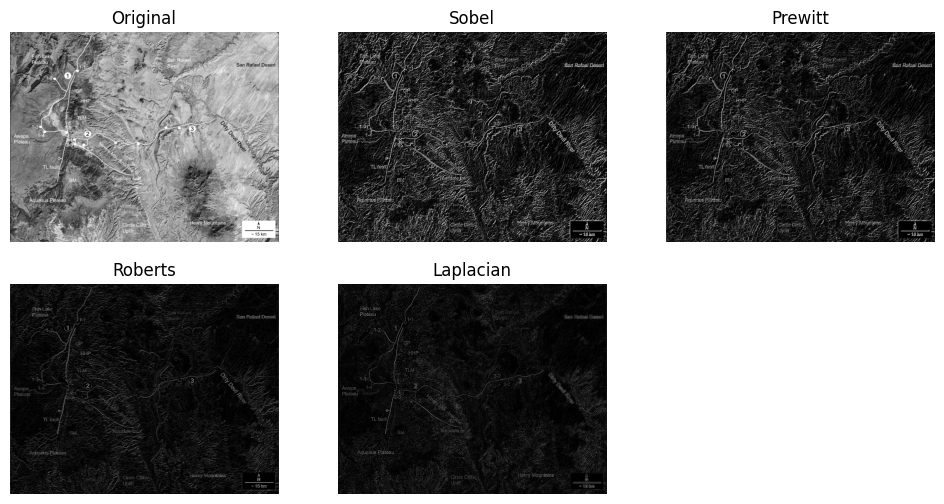

In [ ]:
#9

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread("C:/Users/ARSHAN/Desktop/5th/codes/trials/s.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found! Check the file path.")

# ========================== 1️⃣ Sobel Filter ==========================
# ➤ **Use Case**: Used in object detection, medical imaging (MRI edge detection).
# ➤ **Significance**: Enhances edges by giving more weight to central pixels.

sobel_x_kernel = np.array([[-1, 0, 1], 
                           [-2, 0, 2], 
                           [-1, 0, 1]])  # X-direction (Gx)

sobel_y_kernel = np.array([[-1, -2, -1], 
                           [0, 0, 0], 
                           [1, 2, 1]])  # Y-direction (Gy)

# Convolution
sobel_x = cv2.filter2D(img, -1, sobel_x_kernel)
sobel_y = cv2.filter2D(img, -1, sobel_y_kernel)

# Compute gradient magnitude
sobel_mag = cv2.magnitude(sobel_x.astype(float), sobel_y.astype(float))

"""
Mathematical Formula:
G(x, y) = sqrt(Gx² + Gy²)
- Enhances **strong edges** while ignoring weak ones.
- Uses weighted gradient calculations (center pixels matter more).
"""

# ========================== 2️⃣ Prewitt Filter ==========================
# ➤ **Use Case**: Used in industrial applications for **simple edge detection**.
# ➤ **Significance**: Computationally cheaper than Sobel but less accurate.

prewitt_x_kernel = np.array([[-1, 0, 1], 
                             [-1, 0, 1], 
                             [-1, 0, 1]])  # X-direction

prewitt_y_kernel = np.array([[-1, -1, -1], 
                             [0, 0, 0], 
                             [1, 1, 1]])  # Y-direction

# Convolution
prewitt_x = cv2.filter2D(img, -1, prewitt_x_kernel)
prewitt_y = cv2.filter2D(img, -1, prewitt_y_kernel)

# Compute magnitude
prewitt_mag = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))

"""
Mathematical Formula:
G(x, y) = sqrt(Gx² + Gy²)
- Similar to Sobel but **does not emphasize center pixels** as much.
- Works well for **general edge detection** in low-compute environments.
"""

# ========================== 3️⃣ Roberts Filter ==========================
# ➤ **Use Case**: Used in **real-time edge detection**, OCR (Optical Character Recognition).
# ➤ **Significance**: Fastest filter since it uses a 2×2 kernel.

roberts_x_kernel = np.array([[1, 0], 
                             [0, -1]])  # X-direction

roberts_y_kernel = np.array([[0, 1], 
                             [-1, 0]])  # Y-direction

# Convolution
roberts_x = cv2.filter2D(img, -1, roberts_x_kernel)
roberts_y = cv2.filter2D(img, -1, roberts_y_kernel)

# Compute magnitude
roberts_mag = cv2.magnitude(roberts_x.astype(float), roberts_y.astype(float))

"""
Mathematical Formula:
G(x, y) = sqrt(Gx² + Gy²)
- **Quickest** edge detector but lacks accuracy.
- Works well for **small-scale images** (e.g., handwritten text recognition).
"""

# ========================== 4️⃣ Laplacian Filter ==========================
# ➤ **Use Case**: Used in **blob detection**, fingerprint enhancement.
# ➤ **Significance**: Detects **both edges and fine details** (but sensitive to noise).

laplacian_kernel = np.array([[0, -1, 0], 
                             [-1, 4, -1], 
                             [0, -1, 0]])  # 3×3 Laplacian Kernel

# Convolution
laplacian = cv2.filter2D(img, -1, laplacian_kernel)

"""
Mathematical Formula:
L(x, y) = d²f/dx² + d²f/dy²
- Computes **second-order derivatives**, capturing sudden intensity changes.
- Used where both **edge & texture detection** is needed.
"""

# ========================== 🔹 Display Results ==========================
titles = ['Original', 'Sobel', 'Prewitt', 'Roberts', 'Laplacian']
images = [img, sobel_mag, prewitt_mag, roberts_mag, laplacian]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.show()

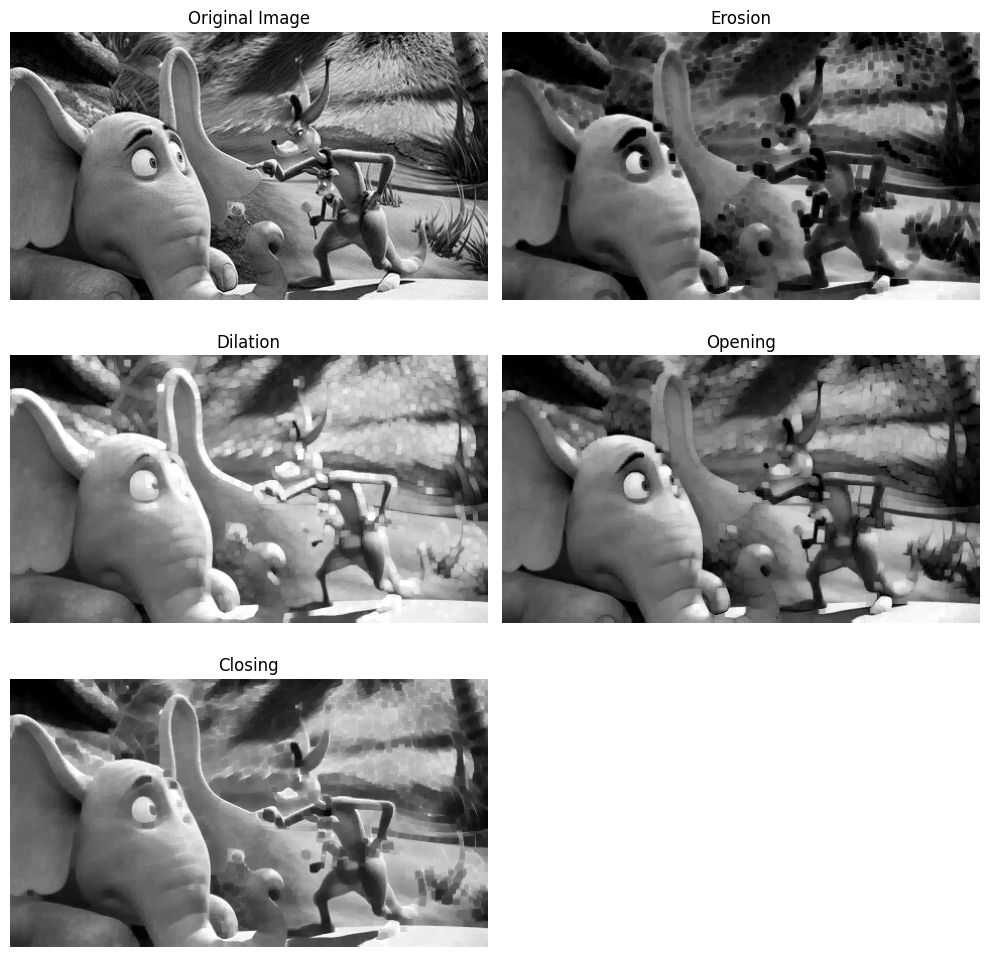

In [ ]:
#10

# Load the image
image = cv2.imread("OIP.jpg", 0)

# Define the structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations
erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(image, kernel, iterations=1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Create figure and axes
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.ravel()  # Flatten the 2D array of axes into 1D for easy iteration

# Define titles and images
titles = ["Original Image", "Erosion", "Dilation", "Opening", "Closing"]
images = [image, erosion, dilation, opening, closing]

# Plot images
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Remove extra subplot if any
fig.delaxes(axes[-1])  # Remove the last empty subplot

plt.tight_layout()
plt.show()


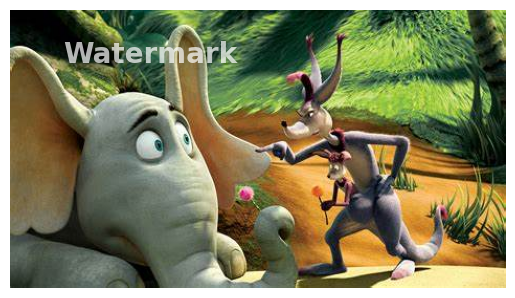

In [ ]:
#13

import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread("OIP.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis("off")  # Hide axes

# Add watermark text
ax.text(50, 50, "Watermark", fontsize=20, color="white", alpha=0.7, fontweight="bold")

# Save or display the image
plt.savefig("watermarked.jpg", bbox_inches="tight", dpi=300)
plt.show()
